<a href="https://colab.research.google.com/github/iswaryajeni/Data_Science/blob/main/Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

# Load the dataset
df = pd.read_csv('/content/student-dataset.csv')  # Replace with your file

# Explore data
print(df.head())
print(df.info())
print(df.describe())

   id             name               nationality                 city  \
0   0        Kiana Lor                     China               Suzhou   
1   1   Joshua Lonaker  United States of America        Santa Clarita   
2   2    Dakota Blanco  United States of America              Oakland   
3   3  Natasha Yarusso  United States of America        Castro Valley   
4   4   Brooke Cazares                    Brazil  São José dos Campos   

   latitude  longitude gender  ethnic.group  age  english.grade  math.grade  \
0     31.31     120.62      F           NaN   22            3.5         3.7   
1     34.39    -118.54      M           NaN   22            2.9         3.2   
2     37.80    -122.27      F           NaN   22            3.9         3.8   
3     37.69    -122.09      F           NaN   20            3.3         2.8   
4    -23.18     -45.88      F           NaN   21            3.7         2.6   

   sciences.grade  language.grade  portfolio.rating  coverletter.rating  \
0          

In [4]:
df.drop(['age','gender','city'],axis=1,inplace=True)

In [5]:
print("Missing values before handling:\n",df.isnull().sum())

Missing values before handling:
 id                      0
name                    0
nationality             0
latitude                0
longitude               0
ethnic.group          307
english.grade           0
math.grade              0
sciences.grade          0
language.grade          0
portfolio.rating        0
coverletter.rating      0
refletter.rating        0
dtype: int64


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [15]:
# Handle missing values if any
df = df.dropna()  # or use imputation

# Print the columns to confirm 'Internet_available' exists
print(df.columns)

# Convert categorical variables (like Internet availability)
# Check if the column exists before mapping
if 'Internet_available' in df.columns:
    df['Internet_available'] = df['Internet_available'].map({'Yes': 1, 'No': 0})
else:
    print("Column 'Internet_available' not found in the DataFrame.")

# Check target variable type
target_type = 'numerical'  # Change based on your data

Index(['id', 'name', 'nationality', 'latitude', 'longitude', 'ethnic.group',
       'english.grade', 'math.grade', 'sciences.grade', 'language.grade',
       'portfolio.rating', 'coverletter.rating', 'refletter.rating'],
      dtype='object')
Column 'Internet_available' not found in the DataFrame.


In [16]:
# Handle missing values if any
# df = df.dropna()  # or use imputation
# Instead of dropping all rows with missing values,
# try imputing them with the mean or median of the column.
for column in df.columns:
    if df[column].isnull().any():
        if pd.api.types.is_numeric_dtype(df[column]):
            df[column] = df[column].fillna(df[column].mean())  # Impute with mean
        else:
            df[column] = df[column].fillna(df[column].mode()[0])  # Impute with mode for categorical

# Print the columns to confirm 'Internet_available' exists
print(df.columns)

# ... (rest of your code)

Index(['id', 'name', 'nationality', 'latitude', 'longitude', 'ethnic.group',
       'english.grade', 'math.grade', 'sciences.grade', 'language.grade',
       'portfolio.rating', 'coverletter.rating', 'refletter.rating'],
      dtype='object')


In [18]:
import matplotlib.pyplot as plt

In [20]:
import seaborn as sns

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


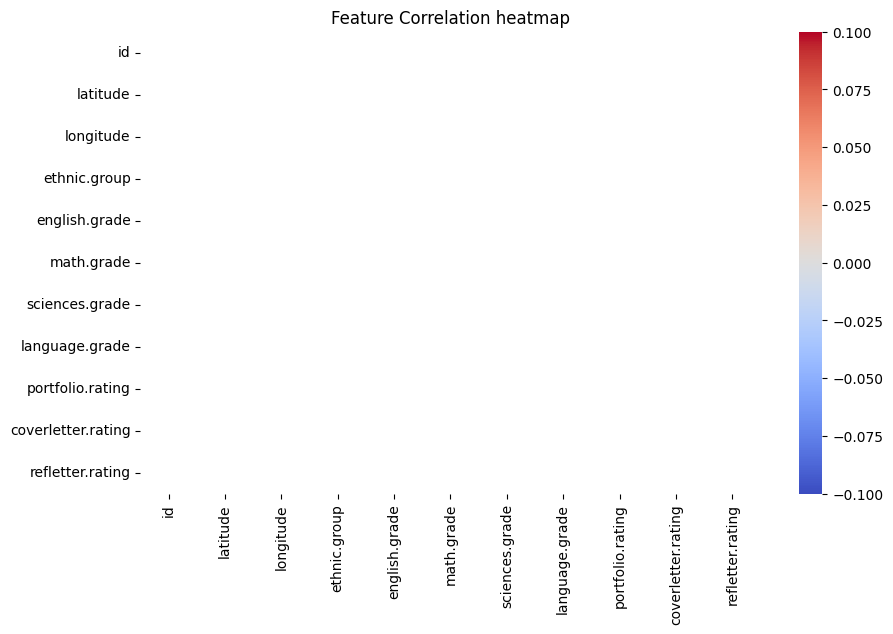

In [21]:
numeric_df = df.select_dtypes(include=['float64','int64'])
numeric_df.fillna(numeric_df.median(),inplace=True)

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm',fmt =".2f")
plt.title("Feature Correlation heatmap")
plt.show()